
<h1 style="padding: 0px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
The Spark Foundation Gratuate Rotational Intership Program</h1>
<h1 style="padding: 0px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Data Science and Business Analytics intern</h1>
<h2 style=" color:#0b0265; font-weight: bold; font-family: Cursive">
Task 7 :- Stock Market Prediction using 
Numerical and Textual Analysis
</h2>
<h2 style=" color:#0b0265; font-weight: bold; font-family: Cursive">
Objective :- Create a hybrid model for stock price/performance 
prediction using numerical analysis of historical stock prices, and 
sentimental analysis of news headlines.
 </h2>
<h3 style=" color:#0b0265; font-weight: bold; font-family: Cursive">
Performed by :- Syed Maqbool </h3> 

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Import Libraries</h2>

In [1]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Import Dataset</h2>

In [2]:
# reading the datasets into pandas
price = pd.read_csv('BP.csv')
headlines = pd.read_csv('india-news-headlines.csv')

In [3]:
price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,49.0625,49.4375,48.5625,48.6250,17.020395,2431200
1,2001-01-03,49.2500,49.4375,47.5625,47.8750,16.757864,3861900
2,2001-01-04,47.8125,48.1250,47.1875,47.8750,16.757864,3025400
3,2001-01-05,48.3750,48.8125,48.3750,48.6875,17.042269,3614100
4,2001-01-08,49.0000,49.3125,48.5625,48.6250,17.020395,1874300


In [4]:
headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


<h1 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
EDA</h1>

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Price</h2>

In [5]:
price.shape

(5565, 7)

In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5565 non-null   object 
 1   Open       5565 non-null   float64
 2   High       5565 non-null   float64
 3   Low        5565 non-null   float64
 4   Close      5565 non-null   float64
 5   Adj Close  5565 non-null   float64
 6   Volume     5565 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 304.5+ KB


<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Checking Null Values</h2>

In [7]:
price.isnull().sum()/len(price)*100

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Checking Duplicated Values</h2>

In [8]:
price.duplicated().sum()

0

In [9]:
#droping Adj Close columns which is not required.
price.drop(['Adj Close'], axis=1, inplace=True)

In [10]:
price['Date']= pd.to_datetime(price['Date']).dt.normalize()

**dt.normalize()** method : 
- set the time component of the datetime to midnight (00:00:00).
- remove the timezone information.

In [11]:
price.head()

,Date,Open,High,Low,Close,Volume
0,2001-01-02,49.0625,49.4375,48.5625,48.6250,2431200
1,2001-01-03,49.2500,49.4375,47.5625,47.8750,3861900
2,2001-01-04,47.8125,48.1250,47.1875,47.8750,3025400
3,2001-01-05,48.3750,48.8125,48.3750,48.6875,3614100
4,2001-01-08,49.0000,49.3125,48.5625,48.6250,1874300


<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Headlines</h2>

In [12]:
headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Checking Null Values</h2>

In [13]:
headlines.isnull().sum()/len(price)*100

publish_date         0.0
headline_category    0.0
headline_text        0.0
dtype: float64

In [14]:
#droping un-nessary columns
headlines.drop(['headline_category'] , axis=1, inplace=True)

In [15]:
headlines['publish_date'] = headlines['publish_date'].astype(str)
headlines['publish_date'] = headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
headlines['publish_date'] = pd.to_datetime(headlines['publish_date']).dt.normalize()

In [16]:
headlines.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic



<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Grouping Same Day Headlines</h2>

In [17]:
# grouping the news headlines according to 'Date'
headlines = headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()
headlines

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,"Powerless north India gropes in the dark,Think..."
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...
7713,2022-03-28,As fashion becomes democratic; demand for styl...
7714,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
7715,2022-03-30,"I will not give in to trends: Dossmode,The tim..."



<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Merging Dataset</h2>

In [18]:
# join the two DataFrames on same date 
data=pd.merge(price,headlines,left_on='Date', right_on='publish_date')

In [19]:
data.head()

,Date,Open,High,Low,Close,Volume,publish_date,headline_text
0,2001-01-02,49.0625,49.4375,48.5625,48.6250,2431200,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,49.2500,49.4375,47.5625,47.8750,3861900,2001-01-03,"Powerless north India gropes in the dark,Think..."
2,2001-01-04,47.8125,48.1250,47.1875,47.8750,3025400,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,48.3750,48.8125,48.3750,48.6875,3614100,2001-01-05,Light combat craft takes India into club class...
4,2001-01-08,49.0000,49.3125,48.5625,48.6250,1874300,2001-01-08,"Sangh Parivar; Babri panel up the ante,Frontru..."


In [20]:
#droping unecessary columns
data.drop(['publish_date'], axis=1, inplace=True)

In [21]:
#setting index 
data.set_index('Date', inplace= True)

In [22]:
data.head()

,Open,High,Low,Close,Volume,headline_text
Date,,,,,,
2001-01-02,49.0625,49.4375,48.5625,48.6250,2431200,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,49.2500,49.4375,47.5625,47.8750,3861900,"Powerless north India gropes in the dark,Think..."
2001-01-04,47.8125,48.1250,47.1875,47.8750,3025400,The string that pulled Stephen Hawking to Indi...
2001-01-05,48.3750,48.8125,48.3750,48.6875,3614100,Light combat craft takes India into club class...
2001-01-08,49.0000,49.3125,48.5625,48.6250,1874300,"Sangh Parivar; Babri panel up the ante,Frontru..."



<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Sentiment Analyzing With TextBlob</h2>

In [23]:
#pip install textblob
from textblob import TextBlob

In [24]:
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [25]:
#Adding sentiment score columns
data['SentimentScore'] = data['headline_text'].apply(get_sentiment_score)


In [26]:
data.head()

,Open,High,Low,Close,Volume,headline_text,SentimentScore
Date,,,,,,,
2001-01-02,49.0625,49.4375,48.5625,48.6250,2431200,Status quo will not be disturbed at Ayodhya; s...,0.113725
2001-01-03,49.2500,49.4375,47.5625,47.8750,3861900,"Powerless north India gropes in the dark,Think...",0.108333
2001-01-04,47.8125,48.1250,47.1875,47.8750,3025400,The string that pulled Stephen Hawking to Indi...,0.132492
2001-01-05,48.3750,48.8125,48.3750,48.6875,3614100,Light combat craft takes India into club class...,0.252557
2001-01-08,49.0000,49.3125,48.5625,48.6250,1874300,"Sangh Parivar; Babri panel up the ante,Frontru...",-0.017149


- **Sentiment scores** typically range from -1.0 to +1.0
- where -1.0 indicates a highly negative sentiment
- 0.0 indicates a neutral sentiment
- +1.0 indicates a highly positive sentiment.

In [27]:
#droping un-nessary columns
data.drop(['headline_text'], axis=1, inplace=True)

In [28]:
data.head()

,Open,High,Low,Close,Volume,SentimentScore
Date,,,,,,
2001-01-02,49.0625,49.4375,48.5625,48.6250,2431200,0.113725
2001-01-03,49.2500,49.4375,47.5625,47.8750,3861900,0.108333
2001-01-04,47.8125,48.1250,47.1875,47.8750,3025400,0.132492
2001-01-05,48.3750,48.8125,48.3750,48.6875,3614100,0.252557
2001-01-08,49.0000,49.3125,48.5625,48.6250,1874300,-0.017149



<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Visualization</h2>

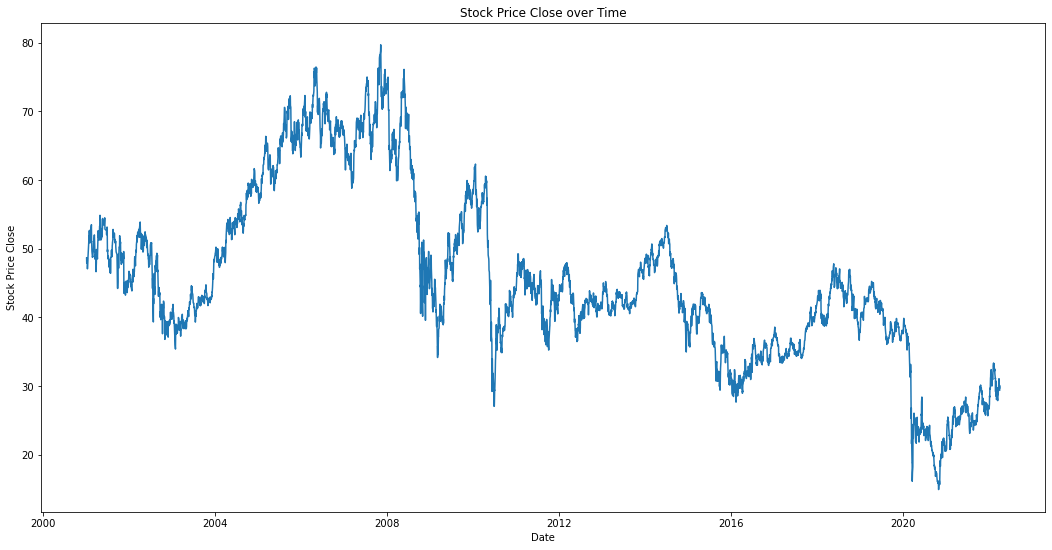

In [29]:
# plot the stock price close over time
plt.figure(figsize=(18,9))
plt.plot(data.index, data['Close'])
plt.title('Stock Price Close over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price Close')
plt.show()

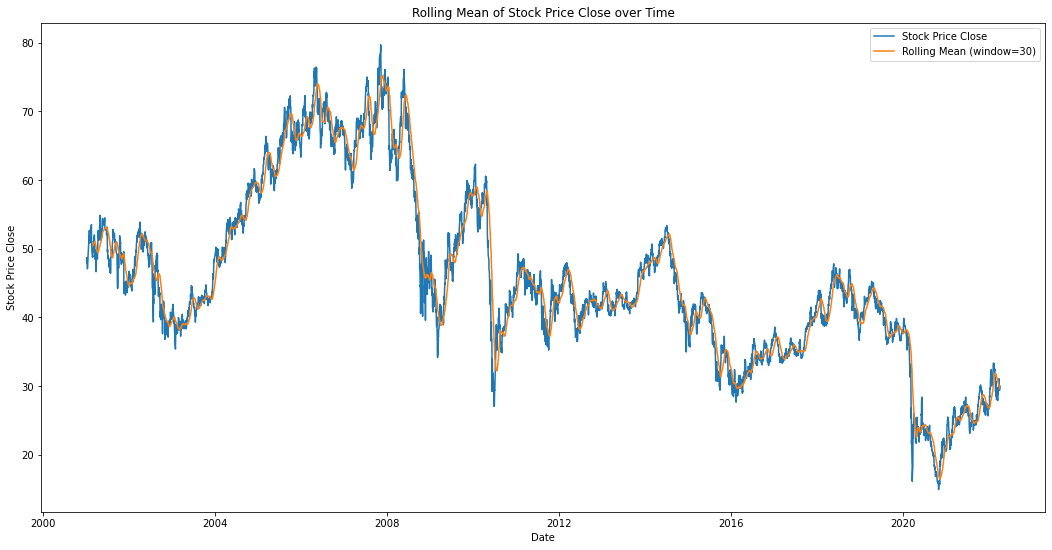

In [30]:
# plot a rolling mean of the stock price close over time
plt.figure(figsize=(18,9))
rolling_mean = data['Close'].rolling(window=30).mean() # calculate rolling mean with a window size of 30
plt.plot(data.index, data['Close'], label='Stock Price Close')
plt.plot(data.index, rolling_mean, label='Rolling Mean (window=30)')
plt.title('Rolling Mean of Stock Price Close over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price Close')
plt.legend()
plt.show()


<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Data Scaling With MinMax-Scaler</h2>


- Scaling data is the process of transforming the data so that it fits within a specific range.
- This can be useful in many different applications, such as machine learning, data analysis, and data visualization. 

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Select only the columns you want to scale
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume', 'SentimentScore']
data_to_scale = data[columns_to_scale]

# Apply min-max scaling to the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=columns_to_scale, index=data.index)

# Print the first few rows of the scaled data
scaled_data.head()

,Open,High,Low,Close,Volume,SentimentScore
Date,,,,,,
2001-01-02,0.526208,0.529510,0.526994,0.520448,0.007456,0.545559
2001-01-03,0.529103,0.529510,0.511413,0.508873,0.013413,0.539216
2001-01-04,0.506909,0.509152,0.505570,0.508873,0.009930,0.567637
2001-01-05,0.515594,0.519815,0.524073,0.521412,0.012381,0.708890
2001-01-08,0.525243,0.527571,0.526994,0.520448,0.005137,0.391590



<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Model</h2>

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Split the data into training and testing sets
X = data.drop('Close', axis=1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define a list of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=0))
]

# Define a function to train and test each model, and return the RMSE and R-squared score
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} RMSE: {rmse:.2f}')
    print(f'{name} R-squared: {r2:.2f}')
    return rmse, r2

# Apply each model to the training and testing sets, and print the RMSE and R-squared score
for name, model in models:
    print(f'*** {name} ***')
    evaluate_model(name, model, X_train, X_test, y_train, y_test)
    print()

*** Linear Regression ***
Linear Regression RMSE: 0.24
Linear Regression R-squared: 1.00

*** Random Forest ***
Random Forest RMSE: 0.30
Random Forest R-squared: 1.00



<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h4 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
    Thanks for your attention and for reviewing my notebook.🙌 <br><br>Please write your comments for me.📝</h4></center>
<center><h4 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
If you liked my work and found it useful, please upvote. Thank you🙏</h4></center>
</div>